# Test Case 5 Calculating interaction of randomly generated sphecial gaussian charge distribution with varying r_ext in 3D space

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from fast_multipole_method import operation as op 
from scipy.special import erf
from scipy.special import erfc

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')
def plot_3d(x):
    """plot particles in 3 dimentional"""
    y = np.transpose(x)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(y[0], y[1], y[2])
    ax = ax.view_init(30)
    plt.show()
    return 

In [5]:
#case 5.1 construction: random sphecial Gaussian distributions with varying WS_index
num_distribution = 100
x_i = np.ndarray(shape=(3, num_distribution))
x_i[0] = 20 * np.random.rand(num_distribution) - 10
x_i[1] = 20 * np.random.rand(num_distribution) - 10
x_i[2] = 20 * np.random.rand(num_distribution) - 10
x_i = np.transpose(x_i)
K_i = np.ones(num_distribution)
a_i = 10 * np.random.rand(num_distribution)


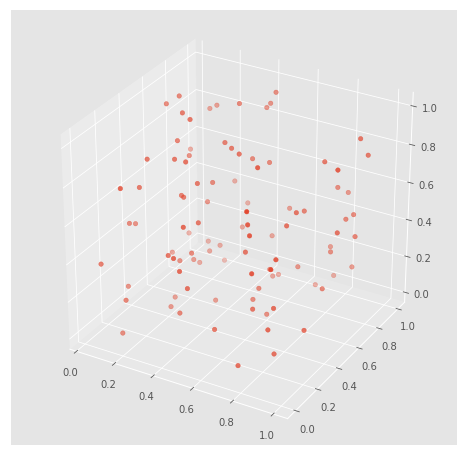

In [6]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)
plot_3d(x0_i)

In [7]:
a_i

array([6.4910444 , 7.80331188, 0.5558571 , 0.53371075, 7.04487637,
       1.65209204, 0.47992256, 8.39661219, 3.55504747, 9.25923324,
       1.51107696, 5.26620752, 8.42494031, 7.92195344, 9.3242907 ,
       5.01531457, 4.61238839, 2.65031251, 2.44138185, 2.41617369,
       4.14204143, 2.8934129 , 1.04956599, 4.04288938, 5.23763846,
       7.47592024, 3.81506123, 8.59201087, 6.15099966, 7.26942323,
       0.01376797, 6.49115359, 3.76048297, 9.01975754, 3.82872557,
       7.53307245, 2.71477081, 9.39131868, 0.37453475, 7.2793425 ,
       0.17630205, 0.41504395, 3.23236822, 6.45121773, 0.28140506,
       4.18482146, 1.21135805, 9.50246067, 4.99742253, 4.39470469,
       8.05623512, 4.75480857, 4.95028869, 1.2281746 , 7.86203286,
       4.73692048, 9.21257295, 2.17453941, 3.41047074, 7.16131993,
       5.45647402, 9.65043325, 7.11059067, 5.74878033, 3.8227337 ,
       2.50977588, 1.84707431, 7.48091937, 3.34799169, 7.09936799,
       7.62724738, 7.09911645, 5.31123138, 9.93296219, 3.43499

In [8]:
WS_max = 2 * (erfc(1-1e-16) * 8) * np.sqrt(2/min(a_i))
WS_max

30.33378207225472

In [9]:
# analytical answer
pair_potential = np.zeros(shape=(num_distribution,num_distribution)) 
pre_factor = np.power(np.pi, 3) 
for i in range(0, num_distribution):
    for j in range(i+1, num_distribution):
        pre_factor2 = K_i[i] * K_i[j] / ( np.power(a_i[i]*a_i[j], 1.5) * op.distance_cal(x0_i[i], x0_i[j]))
        t_sqrt = np.sqrt(a_i[i]*a_i[j]/(a_i[i]+a_i[j])) * op.distance_cal(x0_i[i], x0_i[j]) * scale_factor[1]
        pair_potential[i][j] = pre_factor * pre_factor2 * erf(t_sqrt)
        
pair_potential /= scale_factor[1]
pair_potential

array([[0.        , 0.0049537 , 0.22849289, ..., 0.02543334, 0.02870303,
        0.00830378],
       [0.        , 0.        , 0.60387614, ..., 0.00977678, 0.02991259,
        0.01016351],
       [0.        , 0.        , 0.        , ..., 0.47084135, 1.46974453,
        0.46732437],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.08966298,
        0.01424481],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03326357],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
J_analytic = np.zeros(num_distribution)
for i in range(0, num_distribution):
    for j in range(0, num_distribution):
        if j<i:
            J_analytic[i] += pair_potential[j][i]
        if j>i:
            J_analytic[i] += pair_potential[i][j]

J_analytic

array([1.20958457e+02, 7.13160555e+01, 3.54248127e+03, 2.76311250e+03,
       6.63204899e+01, 7.86796796e+02, 5.23742484e+03, 8.77722103e+01,
       3.46546673e+02, 8.32104621e+01, 8.22713984e+02, 1.06784067e+02,
       5.82481758e+01, 8.89506837e+01, 6.45591798e+01, 1.36443723e+02,
       1.40513833e+02, 2.88093909e+02, 4.13667996e+02, 3.98036565e+02,
       1.27904431e+02, 2.25503958e+02, 1.19166963e+03, 1.86618330e+02,
       1.34901179e+02, 1.00452880e+02, 3.33626219e+02, 6.02360807e+01,
       7.29957091e+01, 9.08554365e+01, 8.14676269e+04, 1.18767697e+02,
       1.75695216e+02, 7.59413325e+01, 2.47023708e+02, 5.14033169e+01,
       2.85745403e+02, 6.22502720e+01, 1.13424744e+04, 8.17677723e+01,
       1.96077797e+04, 4.23091462e+03, 2.65160408e+02, 7.35816941e+01,
       7.70795193e+03, 2.55619603e+02, 1.89309077e+03, 6.41091442e+01,
       1.31115803e+02, 1.88344434e+02, 5.71423057e+01, 1.06511994e+02,
       1.16013533e+02, 1.37766724e+03, 1.10711851e+02, 1.21514121e+02,
      

In [11]:
total_energy = 0.5 * sum(J_analytic)
total_energy

85234.954797229

In [12]:
from continuous_fast_multipole_method import cfmm
from fast_multipole_method import fmm
from fast_multipole_method import fmm_q_gaussain_distribution as fq

In [13]:
# build list of q_source
q_source = np.ndarray(shape=(len(x0_i)), dtype=fq) 
for i in range(0, len(x0_i)):
    q_source[i] = fq(x0_i[i], a_i[i], K_i[i])

In [14]:
btm_level = 3
p = 10
ws_ref = 2
[J_far_field, J_near_field] = cfmm(q_source, btm_level, p, scale_factor[1], ws_ref)

constructions of level 3; WS_index=2
constructions of level 3; WS_index=6
constructions of level 3; WS_index=4
constructions of level 3; WS_index=32
constructions of level 3; WS_index=10
constructions of level 3; WS_index=8
constructions of level 2; WS_index=2
constructions of level 2; WS_index=4
constructions of level 2; WS_index=6
constructions of level 2; WS_index=16
constructions of level 1; WS_index=2
constructions of level 1; WS_index=4
constructions of level 1; WS_index=8
constructions finished, procede to evaluation of interactions
interactions at level 2; WS_index=2
interactions at level 2; WS_index=4
interactions at level 2; WS_index=6
interactions at level 2; WS_index=16
interactions at level 3; WS_index=2
interactions at level 3; WS_index=4
interactions at level 3; WS_index=6
interactions at level 3; WS_index=8
interactions at level 3; WS_index=10
interactions at level 3; WS_index=32
Start to evaluating J matrix based on near and far field
J matrix ecaluation finished!


In [15]:
J_far_field

array([ 2.74478107,  2.74678601, 42.90786356, 48.56363212, 18.95515194,
        8.51391612, 18.95938714,  1.87972403,  7.09394699,  1.54259942,
       22.72410958,  3.42772789,  2.46799148,  1.63885246,  4.25368558,
        4.95478797, 12.06412026,  3.89860672, 12.06000406,  3.98529547,
       11.19093314,  5.71770308, 49.58641473,  7.79112834,  5.42030643,
        6.4351506 ,  7.15293708,  1.90333677,  4.48883659,  3.53179101,
        0.        ,  3.06443289,  9.89844821,  1.72441049,  4.73244616,
        3.23552933,  6.79278763,  1.20061283, 60.09554489,  1.65632958,
        8.88796445, 37.94747883,  4.8669341 ,  2.74688835, 65.58164043,
        2.85433265, 26.581254  ,  2.0180303 ,  5.64421914,  4.59069875,
        2.38345815,  6.55235217,  6.00306748,  6.70909194,  2.60828685,
        5.6326643 ,  1.26674139, 15.54249434, 11.21337678,  3.58632548,
        4.06931071,  2.29700358,  2.36953149,  3.18497358,  6.01283657,
       11.80444643, 17.69795008,  2.46078956, 10.09233865,  2.61

In [16]:
a_i

array([6.4910444 , 7.80331188, 0.5558571 , 0.53371075, 7.04487637,
       1.65209204, 0.47992256, 8.39661219, 3.55504747, 9.25923324,
       1.51107696, 5.26620752, 8.42494031, 7.92195344, 9.3242907 ,
       5.01531457, 4.61238839, 2.65031251, 2.44138185, 2.41617369,
       4.14204143, 2.8934129 , 1.04956599, 4.04288938, 5.23763846,
       7.47592024, 3.81506123, 8.59201087, 6.15099966, 7.26942323,
       0.01376797, 6.49115359, 3.76048297, 9.01975754, 3.82872557,
       7.53307245, 2.71477081, 9.39131868, 0.37453475, 7.2793425 ,
       0.17630205, 0.41504395, 3.23236822, 6.45121773, 0.28140506,
       4.18482146, 1.21135805, 9.50246067, 4.99742253, 4.39470469,
       8.05623512, 4.75480857, 4.95028869, 1.2281746 , 7.86203286,
       4.73692048, 9.21257295, 2.17453941, 3.41047074, 7.16131993,
       5.45647402, 9.65043325, 7.11059067, 5.74878033, 3.8227337 ,
       2.50977588, 1.84707431, 7.48091937, 3.34799169, 7.09936799,
       7.62724738, 7.09911645, 5.31123138, 9.93296219, 3.43499

In [17]:
J_near_field

array([1.18194533e+02, 6.85750477e+01, 3.49957341e+03, 2.71454887e+03,
       6.30681576e+01, 7.78371546e+02, 5.21846545e+03, 8.58794789e+01,
       3.39418530e+02, 8.16690541e+01, 7.99989330e+02, 1.03416850e+02,
       5.57873459e+01, 8.73118312e+01, 6.27649128e+01, 1.31471647e+02,
       1.34095706e+02, 2.84463018e+02, 4.01489060e+02, 3.94316660e+02,
       1.16716388e+02, 2.19976112e+02, 1.14211354e+03, 1.78765004e+02,
       1.29479524e+02, 9.87501761e+01, 3.26381525e+02, 5.83316095e+01,
       6.85044458e+01, 8.72973023e+01, 8.14676269e+04, 1.15671232e+02,
       1.65832564e+02, 7.42008401e+01, 2.42291262e+02, 4.81613098e+01,
       2.79048118e+02, 6.10496591e+01, 1.12823789e+04, 8.01499483e+01,
       1.95988917e+04, 4.19296714e+03, 2.60293474e+02, 7.08646978e+01,
       7.64237029e+03, 2.52765270e+02, 1.86600137e+03, 6.20733231e+01,
       1.25477510e+02, 1.83846340e+02, 5.47581347e+01, 9.99978155e+01,
       1.10068773e+02, 1.37095815e+03, 1.08077949e+02, 1.15847003e+02,
      

In [18]:
J_total = J_far_field + J_near_field
J_total

array([1.20939314e+02, 7.13218337e+01, 3.54248127e+03, 2.76311250e+03,
       8.20233095e+01, 7.86885462e+02, 5.23742484e+03, 8.77592030e+01,
       3.46512477e+02, 8.32116536e+01, 8.22713440e+02, 1.06844578e+02,
       5.82553374e+01, 8.89506837e+01, 6.70185984e+01, 1.36426435e+02,
       1.46159826e+02, 2.88361625e+02, 4.13549064e+02, 3.98301955e+02,
       1.27907321e+02, 2.25693815e+02, 1.19169996e+03, 1.86556132e+02,
       1.34899831e+02, 1.05185327e+02, 3.33534462e+02, 6.02349463e+01,
       7.29932824e+01, 9.08290933e+01, 8.14676269e+04, 1.18735665e+02,
       1.75731013e+02, 7.59252506e+01, 2.47023708e+02, 5.13968391e+01,
       2.85840905e+02, 6.22502720e+01, 1.13424744e+04, 8.18062779e+01,
       1.96077797e+04, 4.23091462e+03, 2.65160408e+02, 7.36115861e+01,
       7.70795193e+03, 2.55619603e+02, 1.89258262e+03, 6.40913534e+01,
       1.31121729e+02, 1.88437039e+02, 5.71415928e+01, 1.06550168e+02,
       1.16071840e+02, 1.37766724e+03, 1.10686236e+02, 1.21479667e+02,
      

In [19]:
total_energy = 0.5 * sum(J_total)
total_energy

85250.05465895685

In [20]:
J_error = np.abs(J_total-J_analytic) / J_analytic
J_error

array([1.58258787e-04, 8.10222501e-05, 1.20667543e-14, 1.97493522e-15,
       2.36771767e-01, 1.12692810e-04, 3.29940760e-15, 1.48193910e-04,
       9.86760580e-05, 1.43188757e-05, 6.61175098e-07, 5.66669450e-04,
       1.22949061e-04, 1.00202131e-12, 3.80955677e-02, 1.26706835e-04,
       4.01810524e-02, 9.29267282e-04, 2.87505458e-04, 6.66748174e-04,
       2.25971668e-05, 8.41924619e-04, 2.54457313e-05, 3.33289688e-04,
       9.99544617e-06, 4.71111046e-02, 2.75029513e-04, 1.88331654e-05,
       3.32436066e-05, 2.89946325e-04, 3.57244117e-16, 2.69705379e-04,
       2.03743400e-04, 2.11766528e-04, 7.11187891e-12, 1.26018788e-04,
       3.34223081e-04, 1.78970380e-11, 1.60369716e-15, 4.70913389e-04,
       1.85537519e-16, 4.29928176e-16, 3.17208770e-12, 4.06242825e-04,
       0.00000000e+00, 4.84777582e-14, 2.68420823e-04, 2.77507331e-04,
       4.51932231e-05, 4.91681985e-04, 1.24747259e-05, 3.58401977e-04,
       5.02585449e-04, 7.85602401e-14, 2.31364560e-04, 2.83541430e-04,
      

In [21]:
J_far_percentage = J_far_field / J_total
J_far_percentage

array([0.02269552, 0.03851255, 0.01211238, 0.0175757 , 0.2310947 ,
       0.01081977, 0.00361998, 0.02141911, 0.02047241, 0.01853826,
       0.02762093, 0.03208144, 0.04236507, 0.01842428, 0.06347023,
       0.03631839, 0.0825406 , 0.01351985, 0.02916221, 0.01000571,
       0.08749251, 0.02533389, 0.04160982, 0.04176292, 0.04018023,
       0.06117917, 0.02144587, 0.03159855, 0.06149657, 0.03888392,
       0.        , 0.02580887, 0.05632727, 0.02271195, 0.01915786,
       0.06295191, 0.02376423, 0.01928687, 0.00529827, 0.02024697,
       0.00045329, 0.0089691 , 0.01835468, 0.03731598, 0.00850831,
       0.01116633, 0.01404496, 0.03148678, 0.04304564, 0.02436198,
       0.04171144, 0.06149547, 0.05171855, 0.00486989, 0.02356469,
       0.04636714, 0.02619302, 0.04685   , 0.04116797, 0.05488391,
       0.0383944 , 0.0447543 , 0.03818945, 0.02592865, 0.03623787,
       0.03588789, 0.02634992, 0.02519444, 0.04913936, 0.02863382,
       0.0237082 , 0.02743042, 0.0498945 , 0.03908685, 0.02491

In [22]:
btm_level = 3
p = 10
ws_ref = 3
[J_far_field, J_near_field] = fmm(q_source, btm_level, p, scale_factor[1], ws_ref)

constructions of level 3; WS_index=3
constructions of level 2; WS_index=3
constructions finished, procede to evaluation of interactions
interactions at level  3
Start to evaluating J matrix based on near and far field
J matrix ecaluation finished!


In [23]:
J_total = J_far_field + J_near_field
J_error = np.abs(J_total-J_analytic) / J_analytic
J_error

array([3.34339999e-12, 1.51203693e-02, 1.81585941e-02, 8.05576844e-04,
       4.83242660e+00, 4.69447176e-02, 9.58663127e-04, 5.79623775e-14,
       5.31287264e-13, 2.33629868e-13, 2.51428674e-02, 4.81726293e-03,
       9.63386614e-03, 7.38096056e-14, 6.59202548e-02, 2.20162621e-02,
       9.04989133e-01, 2.65992234e-03, 3.43057123e-02, 1.58355174e-02,
       8.48103846e-04, 5.99314624e-04, 6.28020271e-03, 1.97593056e-02,
       3.41427322e-02, 1.24775378e-01, 2.72608881e-14, 2.05068327e-02,
       1.22455497e-03, 5.99889098e-02, 1.27790856e-02, 1.18575651e-13,
       3.58042537e-03, 7.35455903e-12, 4.83007631e-13, 4.76952337e-04,
       4.35017071e-03, 6.38058882e-14, 1.60530086e-13, 3.05747323e-02,
       2.47832401e-02, 2.70002340e-02, 2.55897890e-12, 2.33066298e-03,
       2.81597306e-03, 1.15635020e-13, 3.72332064e-14, 1.05930747e-01,
       1.53243408e-02, 5.38783212e-02, 6.14517674e-03, 7.11114466e-04,
       2.71991376e-03, 7.81245931e-02, 2.11792234e-14, 4.50415274e-03,
      

In [24]:
J_far_field

array([4.84465269e+00, 6.44718164e+01, 3.42385832e+03, 2.70452447e+03,
       3.84887186e+02, 7.98574812e+02, 3.14351706e+02, 2.96887799e+00,
       1.38277714e+01, 2.03029142e+00, 8.20775502e+02, 1.02909877e+02,
       5.43551966e+01, 4.30143023e+00, 7.24185146e+00, 1.33005877e+02,
       2.60129765e+02, 2.70994360e+02, 4.25886293e+02, 3.75809414e+02,
       1.25000366e+02, 2.09314686e+02, 1.17002496e+03, 1.78984870e+02,
       1.34030683e+02, 1.71434935e+01, 1.28934807e+01, 5.94837454e+01,
       7.11937473e+01, 9.05996776e+01, 5.78067225e+04, 3.41007163e+00,
       1.61766165e+02, 2.52644824e+00, 1.25340462e+01, 4.97018564e+01,
       2.72509421e+02, 3.35870614e+00, 4.44189148e+02, 7.89005184e+01,
       1.96455884e+04, 4.22808977e+03, 1.60833661e+01, 6.85479816e+01,
       7.52263170e+03, 9.68740002e+00, 7.70844580e+01, 7.03702704e+01,
       1.25735372e+02, 1.89267648e+02, 5.52259270e+01, 1.01758248e+02,
       1.07788739e+02, 1.38164036e+03, 3.93755464e+00, 1.19143595e+02,
      

In [25]:
J_near_field

array([1.16113804e+02, 7.92256422e+00, 1.82949432e+02, 6.08139313e+01,
       1.92220296e+00, 2.51579371e+01, 4.92809406e+03, 8.48033323e+01,
       3.32718901e+02, 8.11801707e+01, 2.26238702e+01, 4.38859630e+00,
       4.45413442e+00, 8.46492535e+01, 6.15730859e+01, 6.44182700e+00,
       7.54755954e+00, 1.78658564e+01, 1.97287810e+00, 2.85302662e+01,
       3.01254137e+00, 1.63244192e+01, 2.91286001e+01, 1.13209084e+01,
       5.47639088e+00, 9.58434331e+01, 3.20732738e+02, 1.98758655e+00,
       1.89134904e+00, 5.70607747e+00, 2.47019862e+04, 1.15357625e+02,
       1.45581147e+01, 7.34148842e+01, 2.34489662e+02, 1.72597746e+00,
       1.44790229e+01, 5.88915658e+01, 1.08982853e+04, 5.36728167e+00,
       4.48135589e+02, 1.17060530e+02, 2.49077042e+02, 5.20520663e+00,
       2.07025606e+02, 2.45932203e+02, 1.81600631e+03, 5.30003319e-01,
       7.38969471e+00, 9.22446761e+00, 2.26752820e+00, 4.82948742e+00,
       8.54034103e+00, 1.03656581e+02, 1.06774296e+02, 2.91784435e+00,
      

In [26]:
total_energy = 0.5 * sum(J_total)
total_energy

86563.82496570099

In [32]:
#case 5.2 constuction: uniform distributed sphecial Gaussian distributions with varying WS_index
num_distribution_in_a_box = 1
num_distribution_1D = 3
num_distribution = num_distribution_in_a_box * num_distribution_1D **3
x_i = np.zeros(shape=(num_distribution,3))

for i in range(0,num_distribution_1D):
    for j in range(0,num_distribution_1D):
        for k in range(0,num_distribution_1D):
            x_i[i*num_distribution_1D*num_distribution_1D+j*num_distribution_1D+k] = [i,j,k]

K_i = np.ones(num_distribution)
a_i = 10 * np.random.rand(num_distribution)

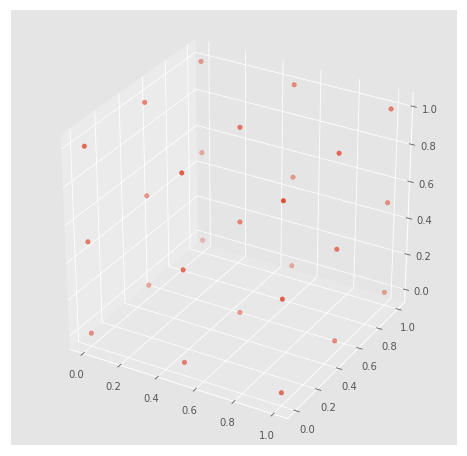

In [33]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)
plot_3d(x0_i)

In [34]:
a_i

array([3.72823041, 1.53226314, 4.03335591, 3.12656591, 9.15650382,
       9.05970295, 0.10252833, 6.64901606, 0.2166241 , 2.03104271,
       6.01034698, 4.03650815, 1.05159343, 7.23845064, 5.00358   ,
       8.94563418, 8.54412223, 7.16770328, 5.75142276, 1.08533115,
       8.28106839, 3.52210675, 7.77737131, 6.83115254, 6.15192814,
       0.68443994, 0.68607911])

In [35]:
WS_max = 2 * (erfc(1-1e-16) * 8) * np.sqrt(2/min(a_i))
WS_max

11.115770417581281

In [36]:
# analytical answer
pair_potential = np.zeros(shape=(num_distribution,num_distribution)) 
pre_factor = np.power(np.pi, 3) 
for i in range(0, num_distribution):
    for j in range(i+1, num_distribution):
        pre_factor2 = K_i[i] * K_i[j] / ( np.power(a_i[i]*a_i[j], 1.5) * op.distance_cal(x0_i[i], x0_i[j]))
        t_sqrt = np.sqrt(a_i[i]*a_i[j]/(a_i[i]+a_i[j])) * op.distance_cal(x0_i[i], x0_i[j]) * scale_factor[1]
        pair_potential[i][j] = pre_factor * pre_factor2 * erf(t_sqrt)
        
pair_potential /= scale_factor[1]
pair_potential

array([[0.00000000e+00, 1.95170772e+00, 2.65845820e-01, 7.28337580e-01,
        1.09797890e-01, 7.06381703e-02, 4.12219877e+01, 1.12350234e-01,
        1.40419137e+01, 1.33196603e+00, 2.06196378e-01, 2.37518312e-01,
        2.62633585e+00, 1.27677259e-01, 1.57108045e-01, 7.19935636e-02,
        7.04074614e-02, 7.48176767e-02, 1.56132547e-01, 1.69722732e+00,
        6.39029563e-02, 2.91405455e-01, 8.10719480e-02, 8.04142973e-02,
        9.98007089e-02, 2.53236483e+00, 2.18756086e+00],
       [0.00000000e+00, 0.00000000e+00, 1.74334527e+00, 2.00193457e+00,
        5.27948671e-01, 4.14556301e-01, 1.49883099e+02, 4.75980384e-01,
        6.03066673e+01, 3.74747794e+00, 9.78376738e-01, 1.37540191e+00,
        8.28770403e+00, 5.79014870e-01, 8.36543755e-01, 2.49416394e-01,
        2.92635878e-01, 3.47744909e-01, 5.29764098e-01, 7.05425984e+00,
        3.06686447e-01, 1.00930093e+00, 3.36949512e-01, 3.73754774e-01,
        3.57116830e-01, 1.01464961e+01, 9.55536457e+00],
       [0.00000000e+00

In [37]:
J_analytic = np.zeros(num_distribution)
for i in range(0, num_distribution):
    for j in range(0, num_distribution):
        if j<i:
            J_analytic[i] += pair_potential[j][i]
        if j>i:
            J_analytic[i] += pair_potential[i][j]

J_analytic

array([  70.59648035,  263.66924866,   60.55403554,  100.54265086,
         21.14290671,   20.20614963, 4672.59985376,   34.33208269,
       3396.39012672,  172.80889836,   36.17151852,   60.81212937,
        485.87090868,   30.57375728,   49.50974676,   21.52171489,
         24.10930176,   29.70200282,   34.56375109,  401.06774859,
         19.40954566,   78.59060959,   25.38801737,   28.9496534 ,
         34.68818635,  846.16570152,  803.54963424])

In [38]:
total_energy = 0.5 * sum(J_analytic)
total_energy

5911.743180586395

In [39]:
# build list of q_source
q_source = np.ndarray(shape=(len(x0_i)), dtype=fq) 
for i in range(0, len(x0_i)):
    q_source[i] = fq(x0_i[i], a_i[i], K_i[i])

In [84]:
btm_level = 3
p = 10
ws_ref = 4
[J_far_field, J_near_field] = cfmm(q_source, btm_level, p, scale_factor[1], ws_ref)

constructions of level 3; WS_index=4
constructions of level 3; WS_index=12
constructions of level 3; WS_index=8
constructions of level 2; WS_index=4
constructions of level 2; WS_index=8
constructions finished, procede to evaluation of interactions
interactions at level 3; WS_index=4
interactions at level 3; WS_index=8
interactions at level 3; WS_index=12
Start to evaluating J matrix based on near and far field
J matrix ecaluation finished!


In [85]:
J_total = J_far_field + J_near_field
J_total

array([  71.66851482,  276.14423799,   64.36016744,  104.43655787,
         21.15852975,   20.2224593 , 4672.59985376,   34.39221528,
       3450.31808145,  175.069581  ,   37.16780673,   63.4588671 ,
        502.96339694,   30.57375728,   49.52056821,   22.28239612,
         24.11034307,   29.70413557,   34.75240903,  410.22617585,
         19.75173411,   79.50967796,   26.03509948,   30.08643501,
         35.21654784,  848.12807147,  805.24627964])

In [86]:
J_far_percentage = J_far_field / J_total
J_far_percentage

array([0.32600799, 0.37595254, 0.4452863 , 0.34805386, 0.11069513,
       0.1551563 , 0.        , 0.1450294 , 0.1309213 , 0.30197251,
       0.32102075, 0.4135479 , 0.28581239, 0.        , 0.05015203,
       0.32760478, 0.05297191, 0.08339975, 0.32162248, 0.37209592,
       0.41804183, 0.27806792, 0.24892703, 0.32225951, 0.31941731,
       0.07251153, 0.10250864])

In [87]:
J_error = np.abs(J_total-J_analytic) / J_analytic
J_error

array([1.51853813e-02, 4.73130234e-02, 6.28551321e-02, 3.87289074e-02,
       7.38926089e-04, 8.07164038e-04, 1.94644252e-16, 1.75149830e-03,
       1.58780213e-02, 1.30819805e-02, 2.75434442e-02, 4.35231879e-02,
       3.51790732e-02, 2.32402818e-16, 2.18572235e-04, 3.53448244e-02,
       4.31910622e-05, 7.18049773e-05, 5.45826002e-03, 2.28351128e-02,
       1.76299051e-02, 1.16943790e-02, 2.54876980e-02, 3.92675379e-02,
       1.52317416e-02, 2.31913199e-03, 2.11143821e-03])